**Công cụ - pandas**

*Thư viện `pandas` cung cấp các công cụ phân tích dữ liệu và cấu trúc dữ liệu hiệu suất cao, dễ sử dụng. Cấu trúc dữ liệu còn được gọi là `DataFrame`, mà bạn có thể xem như bảng 2D trong bộ nhớ (giống như bảng tính, có tên cột và nhãn hàng). Nhiều tính năng có sẵn trong Excel có được hỗ trợ trong pandas, chẳng hạn như tạo bảng tổng hợp, tính toán cột dựa trên các cột khác, vẽ đồ thị, v.v. Bạn cũng có thể nhóm các hàng theo giá trị cột hoặc nối các bảng giống như trong SQL. Pandas cũng rất mạnh mẽ trong việc xử lý chuỗi thời gian.*

Điều kiện tiên quyết:
* NumPy – nếu bạn chưa quen với NumPy, chúng tôi khuyên bạn nên xem [Hướng dẫn về NumPy](tools_numpy.ipynb) ngay bây giờ.

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/tools_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/tools_pandas.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Cài đặt

Đầu tiên, hãy nạp `pandas`. Mọi người thường nạp nó dưới dạng `pd`:

In [1]:
import pandas as pd

# Đối tượng `Series`
Thư viện `pandas` chứa các cấu trúc dữ liệu hữu ích sau:
* Các đối tượng `Series` mà chúng ta sẽ thảo luận ngay bây giờ. Đối tượng `Series` là mảng 1D, tương tự như cột trong bảng tính (có tên cột và nhãn hàng).
* Các đối tượng `DataFrame`. Đây là bảng 2D, tương tự như bảng tính (có tên cột và nhãn hàng).
* Các đối tượng `Panel`. Bạn có thể xem `Panel` dưới dạng từ điển của `DataFrame`. Chúng ít được sử dụng hơn, vì vậy chúng ta sẽ không thảo luận về chúng ở đây.

## Tạo `Series`
Hãy bắt đầu bằng cách tạo đối tượng `Series` đầu tiên của chúng ta!

In [2]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## Tương tự như `ndarray` 1D
Các đối tượng `Series` hoạt động giống như các `ndarray` NumPy một chiều và bạn thường có thể chuyển chúng dưới dạng tham số cho các hàm NumPy:

In [3]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Các phép toán số học trên `Series` cũng có thể thực hiện được và chúng áp dụng *theo từng phần tử*, giống như đối với `ndarray`:

In [4]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

Tương tự như NumPy, nếu bạn thêm một số vào `Series`, thì số đó sẽ được thêm vào tất cả các mục trong `Series`. Điều này được gọi là *broadcasting*:

In [5]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

Điều này cũng đúng với tất cả các phép toán nhị phân như `*` hoặc `/`, và thậm chí cả các phép toán có điều kiện:

In [6]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Nhãn chỉ mục
Mỗi mục trong đối tượng `Series` có một mã định danh duy nhất được gọi là *nhãn chỉ mục*. Theo mặc định, nó chỉ đơn giản là thứ hạng của mục trong `Series` (bắt đầu từ `0`) nhưng bạn cũng có thể đặt nhãn chỉ mục theo cách thủ công:

In [7]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

Sau đó, bạn có thể sử dụng `Series` giống như `dict`:

In [8]:
s2["bob"]

83

Bạn vẫn có thể truy cập các mục theo vị trí số nguyên, giống như trong một mảng thông thường:

In [9]:
s2[1]

83

Để làm rõ khi bạn đang truy cập theo nhãn hoặc theo vị trí số nguyên, bạn nên luôn sử dụng thuộc tính `loc` khi truy cập theo nhãn và thuộc tính `iloc` khi truy cập theo vị trí số nguyên:

In [10]:
s2.loc["bob"]

83

In [11]:
s2.iloc[1]

83

Ta cũng có thể cắt một `Series` sử dụng các nhãn chỉ mục:

In [12]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

Điều này có thể dẫn đến kết quả không mong muốn khi sử dụng nhãn số mặc định, vì vậy hãy cẩn thận:

In [13]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [14]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

Ồ! Phần tử đầu tiên có nhãn chỉ mục `2`. Phần tử có nhãn chỉ mục `0` không có trong lát cắt:

In [15]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


Nhưng hãy nhớ rằng bạn có thể truy cập các phần tử theo vị trí số nguyên bằng cách sử dụng thuộc tính `iloc`. Điều này minh họa một lý do khác tại sao việc sử dụng `loc` và `iloc` để truy cập các đối tượng `Series` luôn tốt hơn:

In [16]:
surprise_slice.iloc[0]

1002

## Khởi tạo từ `dict`
Bạn có thể tạo đối tượng `Series` từ `dict`. Các khóa sẽ được sử dụng làm nhãn chỉ mục:

In [17]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

Bạn có thể kiểm soát những thành phần nào bạn muốn đưa vào `Series` và theo thứ tự nào bằng cách chỉ định rõ ràng `chỉ mục` mong muốn:

In [18]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## Căn chỉnh tự động
Khi một thao tác liên quan đến nhiều đối tượng `Series`, `pandas` sẽ tự động căn chỉnh các mục bằng cách khớp các nhãn chỉ mục.

In [19]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

`Series` kết quả chứa sự kết hợp của các nhãn chỉ mục từ `s2` và `s3`. Vì `"colin"` bị thiếu trong `s2` và `"charles"` bị thiếu trong `s3`, nên các mục này có giá trị kết quả `NaN`. (tức là. Not-a-Number có nghĩa là *thiếu số*).

Căn chỉnh tự động rất tiện dụng khi làm việc với dữ liệu có thể đến từ nhiều nguồn khác nhau với cấu trúc khác nhau và các mục bị thiếu. Nhưng nếu bạn quên đặt đúng nhãn chỉ mục, bạn có thể nhận được kết quả khá ngạc nhiên:

In [20]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

Pandas không thể căn chỉnh `Series`, vì nhãn của chúng hoàn toàn không khớp, do đó kết quả chứa đầy `NaN`.

## Khởi tạo với số vô hướng
Bạn cũng có thể khởi tạo đối tượng `Series` bằng cách sử dụng số vô hướng và danh sách các nhãn chỉ mục: tất cả các mục sẽ được đặt thành số vô hướng.

In [21]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

## Tên `Series`
`Series` có thể có `tên`:

In [22]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## Vẽ đồ thị `Series`
Pandas giúp dễ dàng vẽ biểu đồ dữ liệu `Series` bằng matplotlib (để biết thêm chi tiết về matplotlib, hãy xem [hướng dẫn matplotlib](tools_matplotlib.ipynb)). Chỉ cần nhập matplotlib và gọi phương thức `plot()`:

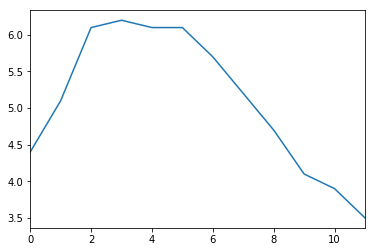

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

Có *nhiều* tùy chọn để vẽ biểu đồ dữ liệu của bạn. Không cần thiết phải liệt kê tất cả chúng ở đây: nếu bạn cần một loại biểu đồ cụ thể (biểu đồ tần số, biểu đồ hình tròn, v.v.), chỉ cần tìm nó trong [Trực quan hóa](http://pandas.pydata.org/pandas-docs/stable/visualization.html) trong tài liệu của pandas và xem mã ví dụ.

# Xử lý thời gian
Nhiều bộ dữ liệu có mốc thời gian và pandas rất giỏi trong thao tác với các dữ liệu đó:
* nó có thể đại diện cho các khoảng thời gian (chẳng hạn như 2016Q3) và tần suất (chẳng hạn như "hàng tháng"),
* nó có thể chuyển đổi các khoảng thời gian thành mốc thời gian thực và *ngược lại*,
* nó có thể lấy mẫu lại dữ liệu và tổng hợp các giá trị theo bất kỳ cách nào bạn muốn.
* nó có thể xử lý các múi giờ.

## Khoảng thời gian
Hãy bắt đầu bằng cách tạo một chuỗi thời gian bằng cách sử dụng `pd.date_range()`. Thao tác này trả về một `DatetimeIndex` chứa mỗi giờ trong 12 giờ bắt đầu từ ngày 29 tháng 10 năm 2016 lúc 5:30 chiều.

In [24]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

`DatetimeIndex` này có thể được sử dụng làm chỉ mục trong `Series`:

In [25]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

Hãy vẽ đồ thị Series này:

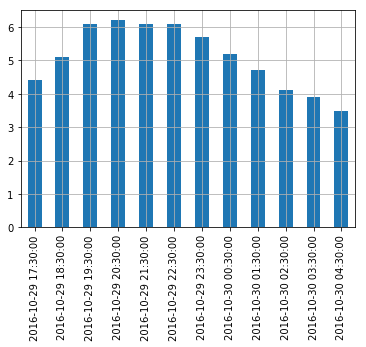

In [26]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

## Lấy mẫu lại
Pandas cho phép chúng ta dễ dàng lấy mẫu lại một chuỗi thời gian. Chỉ cần gọi phương thức `resample()` và chỉ định một tần suất mới:

In [27]:
temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H

DatetimeIndexResampler [freq=<2 * Hours>, axis=0, closed=left, label=left, convention=start, base=0]

Hoạt động lấy mẫu lại thực ra là một hoạt động bị hoãn, đó là lý do tại sao chúng ta không nhận được đối tượng `Series` mà thay vào đó là đối tượng `DatetimeIndexResampler`. Để  thực sự thực hiện thao tác lấy mẫu lại, chúng ta chỉ cần gọi phương thức `mean()`: Pandas sẽ tính giá trị trung bình của mỗi cặp giờ liên tiếp:

In [28]:
temp_series_freq_2H = temp_series_freq_2H.mean()

Hãy vẽ kết quả:

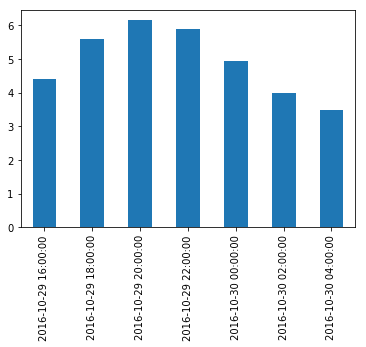

In [29]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

Lưu ý cách các giá trị tự động được tổng hợp thành các khoảng thời gian 2 giờ. Ví dụ: nếu chúng ta xem xét khoảng thời gian 6-8 giờ tối, thì ta có giá trị là `5,1` lúc 6:30 chiều và `6,1` lúc 7:30 tối. Sau khi lấy mẫu lại, chúng ta chỉ có một giá trị là `5.6`, là giá trị trung bình của `5.1` và `6.1`. Thay vì tính toán giá trị trung bình, chúng ta có thể sử dụng bất kỳ hàm tổng hợp nào khác, ví dụ: chúng ta có thể quyết định giữ giá trị nhỏ nhất của mỗi khoảng thời gian:

In [30]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

Hoặc tương tự, chúng ta có thể sử dụng phương thức `apply()` để thay thế:

In [31]:
temp_series_freq_2H = temp_series.resample("2H").apply(np.min)
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

## Lấy mẫu lên và nội suy
Ở trên là một ví dụ về lấy mẫu xuống. Chúng ta cũng có thể  lấy mẫu lên (tức là tăng tần suất), nhưng điều này tạo ra lỗ hổng trong dữ liệu:

In [32]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10) # `head` displays the top n values

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

Một giải pháp là lấp đầy khoảng trống bằng cách nội suy. Chúng ta chỉ cần gọi phương thức `interpolate()`. Mặc định là sử dụng phép nội suy tuyến tính, nhưng chúng ta cũng có thể chọn một phương pháp khác, chẳng hạn như phép nội suy bậc ba:

In [33]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

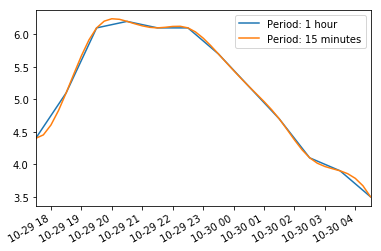

In [34]:
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")
plt.legend()
plt.show()

## Múi giờ
Theo mặc định, thời gian dữ liệu là *sơ khai*: chúng không biết múi giờ, vì vậy 2016-10-30 02:30 có thể có nghĩa là ngày 30 tháng 10 năm 2016 lúc 2:30 sáng ở Paris hoặc ở New York. Chúng ta có thể chỉ định múi giờ bằng cách gọi phương thức `tz_localize()`:

In [35]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
Freq: H, dtype: float64

Lưu ý rằng `-04:00` hiện được thêm vào tất cả các mốc thời gian. Điều này có nghĩa là các mốc thời gian này đề cập đến [UTC](https://en.wikipedia.org/wiki/Coordined_Universal_Time) - 4 giờ.

Chúng ta có thể chuyển đổi các ngày giờ này sang giờ Paris như sau:

In [36]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
Freq: H, dtype: float64

Bạn có thể nhận thấy rằng phần bù UTC thay đổi từ `+02:00` thành `+01:00`: điều này là do Pháp chuyển sang giờ mùa đông lúc 3 giờ sáng vào đêm cụ thể đó (thời gian quay trở lại 2 giờ sáng). Lưu ý rằng 2:30 sáng xảy ra hai lần! Hãy quay lại với một biểu diễn sơ khai (nếu bạn ghi nhật ký một số dữ liệu hàng giờ bằng giờ địa phương mà không lưu trữ múi giờ, bạn có thể nhận được kết quả như sau):

In [37]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2016-10-29 23:30:00    4.4
2016-10-30 00:30:00    5.1
2016-10-30 01:30:00    6.1
2016-10-30 02:30:00    6.2
2016-10-30 02:30:00    6.1
2016-10-30 03:30:00    6.1
2016-10-30 04:30:00    5.7
2016-10-30 05:30:00    5.2
2016-10-30 06:30:00    4.7
2016-10-30 07:30:00    4.1
2016-10-30 08:30:00    3.9
2016-10-30 09:30:00    3.5
Freq: H, dtype: float64

Bây giờ `02:30` thực sự mơ hồ. Nếu chúng ta cố gắng bản địa hóa những ngày giờ sơ khai này sang múi giờ Paris, ta sẽ gặp lỗi:

In [38]:
try:
    temp_series_paris_naive.tz_localize("Europe/Paris")
except Exception as e:
    print(type(e))
    print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from Timestamp('2016-10-30 02:30:00'), try using the 'ambiguous' argument


May mắn thay, bằng cách sử dụng đối số `ambiguous`, chúng ta có thể yêu cầu pandas suy ra đúng DST (Daylight Saving Time) dựa trên thứ tự của các dấu thời gian mơ hồ:

In [39]:
temp_series_paris_naive.tz_localize("Europe/Paris", ambiguous="infer")

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
Freq: H, dtype: float64

## Chu kỳ
Hàm `pd.period_range()` trả về `PeriodIndex` thay vì `DatetimeIndex`. Ví dụ: hãy lấy tất cả các quý trong năm 2016 và 2017:

In [40]:
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

Việc thêm một số `N` vào `PeriodIndex` sẽ dịch chuyển các khoảng thời gian bằng `N` lần tần suất của `PeriodIndex`:

In [41]:
quarters + 3

PeriodIndex(['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3'],
            dtype='period[Q-DEC]', freq='Q-DEC')

Phương thức `asfreq()` cho phép chúng ta thay đổi tần số của `PeriodIndex`. Tất cả các giai đoạn được kéo dài hoặc rút ngắn cho phù hợp. Ví dụ: hãy chuyển đổi tất cả các khoảng thời gian hàng quý thành khoảng thời gian hàng tháng (phóng đại):

In [42]:
quarters.asfreq("M")

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]', freq='M')

Theo mặc định, `asfreq` phóng đại vào cuối mỗi khoảng thời gian. Thay vào đó, chúng ta có thể yêu cầu nó phóng đại vào đầu mỗi khoảng thời gian:

In [43]:
quarters.asfreq("M", how="start")

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10'],
            dtype='period[M]', freq='M')

Và chúng ta có thể thu nhỏ:

In [44]:
quarters.asfreq("A")

PeriodIndex(['2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017'], dtype='period[A-DEC]', freq='A-DEC')

Tất nhiên chúng ta có thể tạo `Series` với `PeriodIndex`:

In [45]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index = quarters)
quarterly_revenue

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

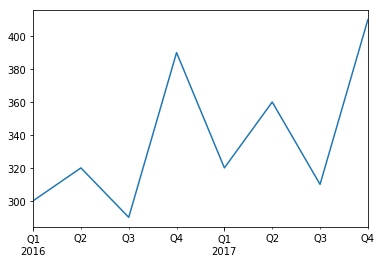

In [46]:
quarterly_revenue.plot(kind="line")
plt.show()

Chúng ta có thể chuyển đổi các khoảng thời gian thành mốc thời gian bằng cách gọi `to_timestamp`. Theo mặc định, điều này sẽ cung cấp cho chúng ta ngày đầu tiên của mỗi khoảng thời gian, nhưng bằng cách đặt `how` và `freq`, chúng ta có thể nhận được giờ cuối cùng của mỗi khoảng thời gian:

In [47]:
last_hours = quarterly_revenue.to_timestamp(how="end", freq="H")
last_hours

2016-03-31 23:00:00    300
2016-06-30 23:00:00    320
2016-09-30 23:00:00    290
2016-12-31 23:00:00    390
2017-03-31 23:00:00    320
2017-06-30 23:00:00    360
2017-09-30 23:00:00    310
2017-12-31 23:00:00    410
Freq: Q-DEC, dtype: int64

Và quay lại thời gian bằng cách gọi `to_period`:

In [48]:
last_hours.to_period()

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

Pandas cũng cung cấp nhiều chức năng khác liên quan đến thời gian mà chúng tôi khuyên bạn nên xem trong [tài liệu](http://pandas.pydata.org/pandas-docs/stable/timeseries.html). Để kích thích sự tò mò của bạn, đây là một cách để có được ngày làm việc cuối cùng của mỗi tháng trong năm 2016, lúc 9 giờ sáng:

In [49]:
months_2016 = pd.period_range("2016", periods=12, freq="M")
one_day_after_last_days = months_2016.asfreq("D") + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("H") + 9

PeriodIndex(['2016-01-29 09:00', '2016-02-29 09:00', '2016-03-31 09:00',
             '2016-04-29 09:00', '2016-05-31 09:00', '2016-06-30 09:00',
             '2016-07-29 09:00', '2016-08-31 09:00', '2016-09-30 09:00',
             '2016-10-31 09:00', '2016-11-30 09:00', '2016-12-30 09:00'],
            dtype='period[H]', freq='H')

# Đối tượng `DataFrame`
Một đối tượng DataFrame đại diện cho một bảng tính, với các giá trị ô, tên cột và nhãn chỉ mục hàng. Bạn có thể xác định các biểu thức để tính toán cột dựa trên các cột khác, tạo bảng tổng hợp, nhóm hàng, vẽ biểu đồ, v.v. Bạn có thể xem `DataFrame` là từ điển của `Series`.

## Tạo `DataFrame`
Bạn có thể tạo DataFrame bằng cách chuyển từ điển các đối tượng `Series`:

In [50]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


Một số điều cần lưu ý:
* `Series` được căn chỉnh tự động dựa trên chỉ mục của chúng,
* các giá trị bị thiếu được biểu thị dưới dạng `NaN`,
* Tên `Series` bị bỏ qua (tên `"year"` đã bị loại bỏ),
* `DataFrame` được hiển thị rõ ràng trong Jupyter Notebook, tuyệt vời!

Bạn có thể truy cập các cột một cách dễ dàng. Chúng được trả về dưới dạng các đối tượng `Series`:

In [51]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

Bạn cũng có thể lấy nhiều cột cùng một lúc:

In [52]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


Nếu bạn chuyển danh sách các cột và/hoặc nhãn hàng chỉ mục cho hàm tạo `DataFrame`, nó sẽ đảm bảo rằng các cột và/hoặc hàng này sẽ tồn tại, theo thứ tự đó và sẽ không tồn tại cột/hàng nào khác. Ví dụ:

In [53]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


Một cách thuận tiện khác để tạo `DataFrame` là chuyển tất cả các giá trị cho hàm tạo dưới dạng `ndarray` hoặc danh sách các danh sách và chỉ định riêng tên cột và nhãn chỉ mục hàng:

In [54]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


Để chỉ định các giá trị bị thiếu, bạn có thể sử dụng các mảng được che dấu của `np.nan` hoặc NumPy:

In [55]:
masked_array = np.ma.asarray(values, dtype=np.object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
        masked_array,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


Thay vì `ndarray`, bạn cũng có thể truyền đối tượng `DataFrame`:

In [56]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3


Cũng có thể tạo `DataFrame` bằng từ điển (hoặc danh sách) lồng trong từ điển (hoặc danh sách):

In [57]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


## Đa chỉ mục
Nếu tất cả các cột là các tuple có cùng kích thước, thì chúng được hiểu là đa chỉ mục. Điều tương tự cũng xảy ra với nhãn chỉ mục hàng. Ví dụ:

In [58]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

private           public         
               children weight birthyear    hobby
London charles      0.0    112      1992      NaN
Paris  alice        NaN     68      1985   Biking
       bob          3.0     83      1984  Dancing

Giờ đây, bạn có thể nhận được một `DataFrame` chứa tất cả các cột `"public"` một cách dễ dàng:

In [59]:
d5["public"]

birthyear    hobby
London charles       1992      NaN
Paris  alice         1985   Biking
       bob           1984  Dancing

In [60]:
d5["public", "hobby"]  # Same result as d5["public"]["hobby"]

London  charles        NaN
Paris   alice       Biking
        bob        Dancing
Name: (public, hobby), dtype: object

## Hạ cấp
Hãy xem lại `d5`:

In [61]:
d5

private           public         
               children weight birthyear    hobby
London charles      0.0    112      1992      NaN
Paris  alice        NaN     68      1985   Biking
       bob          3.0     83      1984  Dancing

Có hai cấp độ cột và hai cấp độ chỉ mục. Chúng ta có thể giảm cấp độ cột bằng cách gọi `droplevel()` (tương tự với các chỉ mục):

In [62]:
d5.columns = d5.columns.droplevel(level = 0)
d5

children  weight  birthyear    hobby
London charles       0.0     112       1992      NaN
Paris  alice         NaN      68       1985   Biking
       bob           3.0      83       1984  Dancing

## Chuyển vị
Bạn có thể hoán đổi các cột và chỉ mục bằng thuộc tính `T`:

In [63]:
d6 = d5.T
d6

London   Paris         
          charles   alice      bob
children        0     NaN        3
weight        112      68       83
birthyear    1992    1985     1984
hobby         NaN  Biking  Dancing

## Xếp chồng và gỡ chồng
Gọi phương thức `stack()` sẽ đẩy cột thấp nhất vào sau chỉ mục thấp nhất:

In [64]:
d7 = d6.stack()
d7

London    Paris
children  bob        NaN        3
          charles      0      NaN
weight    alice      NaN       68
          bob        NaN       83
          charles    112      NaN
birthyear alice      NaN     1985
          bob        NaN     1984
          charles   1992      NaN
hobby     alice      NaN   Biking
          bob        NaN  Dancing

Lưu ý rằng nhiều giá trị `NaN` đã xuất hiện. Điều này có ý nghĩa bởi vì nhiều kết hợp mới không tồn tại trước đây (ví dụ: không có `bob` trong `London`).

Việc gọi `unstack()` sẽ làm ngược lại, một lần nữa tạo ra nhiều giá trị `NaN`.

In [65]:
d8 = d7.unstack()
d8

London                Paris                 
           alice  bob charles   alice      bob charles
children    None  NaN       0    None        3     NaN
weight       NaN  NaN     112      68       83     NaN
birthyear    NaN  NaN    1992    1985     1984     NaN
hobby        NaN  NaN    None  Biking  Dancing    None

Nếu chúng ta gọi lại `unstack`, chúng ta sẽ có một đối tượng `Series`:

In [66]:
d9 = d8.unstack()
d9

London  alice    children        None
                 weight           NaN
                 birthyear        NaN
                 hobby            NaN
        bob      children         NaN
                 weight           NaN
                 birthyear        NaN
                 hobby            NaN
        charles  children           0
                 weight           112
                 birthyear       1992
                 hobby           None
Paris   alice    children        None
                 weight            68
                 birthyear       1985
                 hobby         Biking
        bob      children           3
                 weight            83
                 birthyear       1984
                 hobby        Dancing
        charles  children         NaN
                 weight           NaN
                 birthyear        NaN
                 hobby           None
dtype: object

Các phương thức `stack()` và `unstack()` cho phép bạn chọn `level` để xếp chồng/gỡ chồng. Bạn thậm chí có thể xếp chồng/gỡ chồng nhiều cấp độ cùng một lúc:

In [67]:
d10 = d9.unstack(level = (0,1))
d10

London                Paris                 
           alice  bob charles   alice      bob charles
children    None  NaN       0    None        3     NaN
weight       NaN  NaN     112      68       83     NaN
birthyear    NaN  NaN    1992    1985     1984     NaN
hobby        NaN  NaN    None  Biking  Dancing    None

## Hầu hết các phương thức trả về các bản sao đã sửa đổi
Như bạn có thể nhận thấy, các phương thức `stack()` và `unstack()` không sửa đổi đối tượng mà chúng áp dụng. Thay vào đó, chúng làm việc trên một bản sao và trả lại bản sao đó. Điều này đúng với hầu hết các phương thức trong pandas.

## Truy cập hàng
Hãy quay lại `DataFrame` `people`:

In [68]:
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


Thuộc tính `loc` cho phép bạn truy cập các hàng thay vì các cột. Kết quả là một đối tượng `Series` trong đó tên cột của `DataFrame` được ánh xạ tới nhãn chỉ mục hàng:

In [69]:
people.loc["charles"]

birthyear    1992
children        0
hobby         NaN
weight        112
Name: charles, dtype: object

Bạn cũng có thể truy cập các hàng theo vị trí số nguyên bằng thuộc tính `iloc`:

In [70]:
people.iloc[2]

birthyear    1992
children        0
hobby         NaN
weight        112
Name: charles, dtype: object

Bạn cũng có thể lấy một lát hàng và điều này trả về một đối tượng `DataFrame`:

In [71]:
people.iloc[1:3]

,birthyear,children,hobby,weight
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


Cuối cùng, bạn có thể chuyển một mảng boolean để nhận các hàng phù hợp:

In [72]:
people[np.array([True, False, True])]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
charles,1992,0.0,NaN,112


Điều này hữu ích nhất khi được kết hợp với các biểu thức boolean:

In [73]:
people[people["birthyear"] < 1990]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83


## Thêm, bớt cột
Nhìn chung, bạn có thể xem các đối tượng `DataFrame` giống như từ điển của `Series`:

In [74]:
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [75]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


In [76]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

Khi bạn thêm một cột mới, cột đó phải có cùng số hàng. Các hàng bị thiếu được lấp đầy bằng `NaN` và các hàng thừa sẽ bị bỏ qua:

In [77]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people

,hobby,weight,age,over 30,pets
alice,Biking,68,33,True,NaN
bob,Dancing,83,34,True,0.0
charles,NaN,112,26,False,5.0


Khi thêm một cột mới, nó sẽ được thêm vào cuối (ở bên phải) theo mặc định. Bạn cũng có thể chèn một cột vào bất kỳ nơi nào khác bằng phương thức `insert()`:

In [78]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


## Gán cột mới
Bạn cũng có thể tạo các cột mới bằng cách gọi phương thức `assign()`. Lưu ý rằng điều này trả về một đối tượng `DataFrame` mới, bản gốc không được sửa đổi:

In [79]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


Lưu ý rằng bạn không thể truy cập các cột được tạo trong cùng một tác vụ:

In [80]:
try:
    people.assign(
        body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
        overweight = people["body_mass_index"] > 25
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'body_mass_index'


Giải pháp là chia tác vụ này thành hai tác vụ liên tiếp:

In [81]:
d6 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


Việc phải tạo một biến tạm thời `d6` không thuận tiện lắm. Bạn có thể chỉ muốn tạo một chuỗi các lệnh gọi phân công, nhưng điều này không khả thi vì đối tượng `people` không thực sự được sửa đổi bởi phép gán đầu tiên:

In [82]:
try:
    (people
         .assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
         .assign(overweight = people["body_mass_index"] > 25)
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'body_mass_index'


Nhưng đừng lo, có một giải pháp đơn giản. Bạn có thể chuyển một hàm cho phương thức `assign()` (thường là hàm `lambda`) và hàm này sẽ được gọi với `DataFrame` làm tham số:

In [83]:
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


Vấn đề đã được giải quyết!

## Đánh giá một biểu thức
Một tính năng tuyệt vời được hỗ trợ bởi pandas là đánh giá biểu thức. Điều này yêu cầu thư viện `numexpr` phải được cài đặt.

In [84]:
people.eval("weight / (height/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

Biểu thức gán cũng được hỗ trợ. Hãy đặt `inplace=True` để sửa đổi trực tiếp `DataFrame` thay vì lấy một bản sao đã sửa đổi:

In [85]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index
alice,Biking,172,68,33,True,NaN,22.985398
bob,Dancing,181,83,34,True,0.0,25.335002
charles,NaN,185,112,26,False,5.0,32.724617


Bạn có thể sử dụng một biến cục bộ hoặc biến toàn cục trong một biểu thức bằng cách đặt trước nó `'@'`:

In [86]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


## Truy vấn `DataFrame`
Phương thức `query()` cho phép bạn lọc `DataFrame` dựa trên biểu thức truy vấn:

In [87]:
people.query("age > 30 and pets == 0")

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
bob,Dancing,181,83,34,True,0.0,25.335002,False


## Sắp xếp `DataFrame`
Bạn có thể sắp xếp `DataFrame` bằng cách gọi phương thức `sort_index` của nó. Theo mặc định, nó sắp xếp các hàng theo nhãn chỉ mục của chúng, theo thứ tự tăng dần, nhưng hãy đảo ngược thứ tự:

In [88]:
people.sort_index(ascending=False)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
charles,NaN,185,112,26,False,5.0,32.724617,True
bob,Dancing,181,83,34,True,0.0,25.335002,False
alice,Biking,172,68,33,True,NaN,22.985398,False


Lưu ý rằng `sort_index` đã trả về một *bản sao* đã được sắp xếp của `DataFrame`. Để trực tiếp sửa đổi `people`, chúng ta có thể đặt đối số `inplace` thành `True`. Ngoài ra, chúng ta có thể sắp xếp các cột thay vì các hàng bằng cách đặt `axis=1`:

In [89]:
people.sort_index(axis=1, inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83
charles,26,32.724617,185,NaN,False,True,5.0,112


Để sắp xếp `DataFrame` theo giá trị thay vì nhãn, chúng ta có thể sử dụng `sort_values` và chỉ định cột để sắp xếp theo:

In [90]:
people.sort_values(by="age", inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
charles,26,32.724617,185,NaN,False,True,5.0,112
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83


## Vẽ đồ thị với `DataFrame`
Giống như đối với `Series`, pandas giúp ta dễ dàng vẽ các biểu đồ đẹp dựa trên `DataFrame`.

Ví dụ: việc tạo một biểu đồ đường từ dữ liệu của `DataFrame` bằng cách gọi phương thức `plot` của nó là chuyện nhỏ:

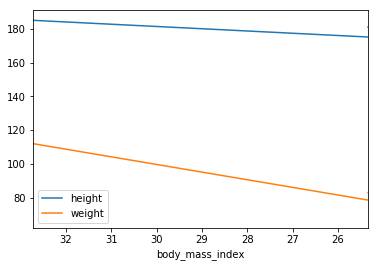

In [91]:
people.plot(kind = "line", x = "body_mass_index", y = ["height", "weight"])
plt.show()

Bạn có thể chuyển các đối số bổ sung được hỗ trợ bởi các hàm của matplotlib. Ví dụ: chúng ta có thể tạo biểu đồ phân tán và chuyển cho nó một danh sách các kích thước bằng cách sử dụng đối số `s` của hàm `scatter()` của matplotlib:

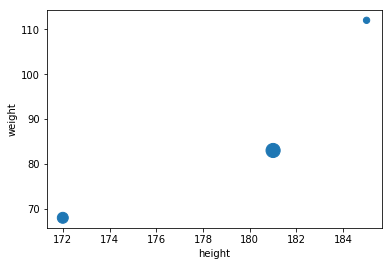

In [92]:
people.plot(kind = "scatter", x = "height", y = "weight", s=[40, 120, 200])
plt.show()

Một lần nữa, có quá nhiều tùy chọn để liệt kê ở đây: tùy chọn tốt nhất là tham khảo trang [Trực quan hóa](http://pandas.pydata.org/pandas-docs/stable/visualization.html) trong tài liệu của pandas, tìm đồ thị mà bạn quan tâm và xem mã ví dụ.

## Toán tử trên `DataFrame`
Mặc dù `DataFrame` không cố gắng bắt chước các mảng NumPy, nhưng có một vài điểm tương đồng. Hãy tạo một `DataFrame` để chứng minh điều này:

In [93]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


Bạn có thể áp dụng các hàm toán học NumPy trên `DataFrame`: hàm được áp dụng cho tất cả các giá trị:

In [94]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


Tương tự, việc thêm một giá trị vào `DataFrame` sẽ thêm giá trị đó vào tất cả các phần tử trong `DataFrame`. Điều này được gọi là *broadcasting*:

In [95]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


Tất nhiên, điều này cũng đúng với tất cả các phép toán nhị phân khác, bao gồm phép toán số học (`*`,`/`,`**`...) và phép toán có điều kiện (`>`, `==`...):

In [96]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


Các hoạt động tổng hợp, chẳng hạn như tính toán `max`, `sum` hoặc `mean` của `DataFrame`, áp dụng cho từng cột và bạn nhận được một đối tượng `Series`:

In [97]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

Phương thức `all` cũng là một thao tác tổng hợp: nó kiểm tra xem tất cả các giá trị có phải là `True` hay không. Hãy xem trong những tháng nào tất cả học sinh đạt điểm cao hơn `5`:

In [98]:
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

Hầu hết các hàm này đều có tham số `axis` tùy chọn cho phép bạn chỉ định dọc theo trục nào của `DataFrame` mà bạn muốn thao tác được thực thi. Giá trị mặc định là `axis=0`, nghĩa là thao tác được thực hiện theo chiều dọc (trên mỗi cột). Bạn có thể đặt `axis=1` để thực hiện thao tác theo chiều ngang (trên mỗi hàng). Ví dụ: hãy tìm xem học sinh nào có tất cả các điểm lớn hơn `5`:

In [99]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

Phương thức `any` trả về `True` nếu bất kỳ giá trị nào là True. Cùng xem ai đạt ít nhất một điểm 10 nào:

In [100]:
(grades == 10).any(axis = 1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

Nếu bạn thêm đối tượng `Series` vào `DataFrame` (hoặc thực thi bất kỳ thao tác nhị phân nào khác), pandas sẽ cố gắng broadcast tới tất cả *hàng* trong `DataFrame`. Điều này chỉ hoạt động nếu `Series` có cùng kích thước với các hàng của `DataFrame`. Ví dụ: hãy trừ `giá trị trung bình` của `DataFrame` (một đối tượng `Series`) khỏi `DataFrame`:

In [101]:
grades - grades.mean()  # equivalent to: grades - [7.75, 8.75, 7.50]

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


Chúng ta đã trừ `7,75` cho tất cả các điểm tháng 9, `8,75` cho các điểm tháng 10 và `7,50` cho các điểm tháng 11. Nó tương đương với việc trừ `DataFrame` này:

In [102]:
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)

,sep,oct,nov
alice,7.75,8.75,7.5
bob,7.75,8.75,7.5
charles,7.75,8.75,7.5
darwin,7.75,8.75,7.5


Nếu bạn muốn trừ đi giá trị trung bình toàn cầu từ mọi cấp độ, đây là một cách để thực hiện:

In [103]:
grades - grades.values.mean() # subtracts the global mean (8.00) from all grades

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


## Căn chỉnh tự động
Tương tự như `Series`, khi hoạt động trên nhiều `DataFrame`, pandas sẽ tự động sắp xếp chúng theo nhãn chỉ mục hàng cũng như theo tên cột. Hãy tạo `DataFrame` với điểm thưởng cho mỗi người từ tháng 10 đến tháng 12:

In [104]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [105]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


Có vẻ như phần bổ sung đã hoạt động trong một số trường hợp nhưng có quá nhiều phần tử hiện đang trống. Đó là bởi vì khi căn chỉnh `DataFrame`, một số cột và hàng chỉ xuất hiện ở một bên và do đó chúng được xem là bị thiếu ở phía bên kia (`NaN`). Sau đó, phép cộng với `NaN` cho kết quả `NaN`, dẫn đến kết quả như trên.

## Xử lý dữ liệu bị thiếu
Xử lý dữ liệu bị thiếu là một nhiệm vụ thường xuyên khi làm việc với dữ liệu thực tế. Pandas cung cấp một số công cụ để xử lý dữ liệu bị thiếu.

Hãy thử khắc phục sự cố trên. Ví dụ: chúng ta có thể quyết định rằng dữ liệu bị thiếu sẽ dẫn đến kết quả là 0, thay vì `NaN`. Chúng ta có thể thay thế tất cả các giá trị `NaN` bằng một giá trị bất kỳ bằng cách sử dụng phương thức `fillna()`:

In [106]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


Tuy nhiên, có một chút không công bằng khi chúng ta đặt điểm bằng 0 vào tháng 9. Có lẽ chúng ta nên quyết định rằng điểm thiếu là điểm thiếu, nhưng điểm thưởng bị thiếu nên được thay thế bằng số không:

In [107]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


Trông đã tốt hơn nhiều: mặc dù chúng ta đã tự tạo một số dữ liệu, nhưng chúng không quá bất công.

Một cách khác để xử lý dữ liệu bị thiếu là nội suy. Hãy xem lại `bonus_points` `DataFrame`:

In [108]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


Bây giờ, hãy gọi phương thức `nội suy`. Theo mặc định, nó nội suy theo chiều dọc (`trục=0`), vì vậy hãy bảo nó nội suy theo chiều ngang (`trục=1`).

In [109]:
bonus_points.interpolate(axis=1)

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


Bob có 0 điểm thưởng vào tháng 10 và 2 vào tháng 12. Khi chúng ta nội suy cho tháng 11, ta nhận được giá trị trung bình: 1 điểm thưởng. Colin có 1 điểm thưởng trong tháng 11, nhưng chúng ta không biết anh ấy có bao nhiêu điểm thưởng trong tháng 9, vì vậy ta không thể nội suy, đây là lý do tại sao vẫn còn thiếu một giá trị trong tháng 10 sau khi nội suy. Để khắc phục, chúng ta có thể set điểm thưởng tháng 9 bằng 0 trước khi nội suy.

In [110]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


Tuyệt vời, bây giờ chúng ta đã có điểm thưởng hợp lý ở khắp mọi nơi. Hãy cùng tìm hiểu các lớp cuối cùng:

In [111]:
grades + better_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


Hơi khó chịu khi cột tháng 9 kết thúc ở bên phải. Điều này là do `DataFrame` mà chúng ta đang thêm không có các cột giống hệt nhau (`DataFrame` `grades` thiếu cột `"dec"`), vì vậy, để làm cho mọi thứ có thể dự đoán được, pandas sắp xếp các cột cuối cùng theo thứ tự abc. Để khắc phục điều này, chúng ta chỉ cần thêm cột bị thiếu trước khi thêm:

In [112]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


Không có nhiều thứ chúng ta có thể làm về tháng 12 và Colin: thật tệ khi chúng ta tự tạo điểm thưởng, nhưng chúng ta không thể tự tạo điểm một cách hợp lý được (tôi đoán một số giáo viên có thể làm được). Vì vậy, hãy gọi phương thức `dropna()` để loại bỏ các hàng chứa đầy `NaN`:

In [113]:
final_grades_clean = final_grades.dropna(how="all")
final_grades_clean

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
darwin,9.0,10.0,11.0,NaN


Bây giờ, hãy xóa các cột chứa đầy `NaN` bằng cách đặt đối số `axis` thành `1`:

In [114]:
final_grades_clean = final_grades_clean.dropna(axis=1, how="all")
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0


## Tổng hợp với `groupby`
Tương tự như ngôn ngữ SQL, pandas cho phép nhóm dữ liệu của bạn thành từng nhóm để chạy tính toán trên từng nhóm.

Trước tiên, hãy thêm một số dữ liệu bổ sung về từng người để chúng ta có thể nhóm họ và hãy quay lại `DataFrame` `final_grades` để xem cách các giá trị `NaN` được xử lý:

In [115]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,NaN,Biking
bob,10.0,9.0,10.0,NaN,Dancing
charles,4.0,11.0,5.0,NaN,NaN
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9.0,10.0,11.0,NaN,Biking


Bây giờ hãy nhóm dữ liệu trong `DataFrame` này theo sở thích:

In [116]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades

Chúng ta đã sẵn sàng để tính điểm trung bình cho mỗi sở thích:

In [117]:
grouped_grades.mean()

,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.0,10.0,NaN
Dancing,10.0,9.0,10.0,NaN


Điều đó thật dễ dàng! Lưu ý rằng các giá trị `NaN` đã bị bỏ qua khi tính rung bình.

## Bảng tổng hợp
Pandas hỗ trợ [bảng tổng hợp](https://en.wikipedia.org/wiki/Pivot_table) dạng bảng tính cho phép tóm tắt dữ liệu nhanh chóng. Để minh họa điều này, hãy tạo một `DataFrame` đơn giản:

In [118]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [119]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ["name", "month", "grade"]
more_grades["bonus"] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,name,month,grade,bonus
0,alice,sep,8.0,NaN
1,alice,oct,8.0,NaN
2,alice,nov,9.0,NaN
3,bob,sep,10.0,0.0
4,bob,oct,9.0,NaN
5,bob,nov,10.0,2.0
6,charles,sep,4.0,3.0
7,charles,oct,11.0,3.0
8,charles,nov,5.0,0.0
9,darwin,sep,9.0,0.0


Bây giờ chúng ta có thể gọi hàm `pd.pivot_table()` cho `DataFrame` này, yêu cầu nhóm theo cột `name`. Theo mặc định, `pivot_table()` tính giá trị trung bình của từng cột số:

In [120]:
pd.pivot_table(more_grades, index="name")

,bonus,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.666667
charles,2.000000,6.666667
darwin,0.333333,10.000000


Chúng ta có thể thay đổi hàm tổng hợp bằng cách đặt đối số `aggfunc` và chúng ta cũng có thể chỉ định danh sách các cột có giá trị sẽ được tổng hợp:

In [121]:
pd.pivot_table(more_grades, index="name", values=["grade","bonus"], aggfunc=np.max)

,bonus,grade
name,,
alice,NaN,9.0
bob,2.0,10.0
charles,3.0,11.0
darwin,1.0,11.0


Chúng ta cũng có thể chỉ định `cột` để tổng hợp theo chiều ngang và yêu cầu tổng cộng cho mỗi hàng và cột bằng cách đặt `margins=True`:

In [122]:
pd.pivot_table(more_grades, index="name", values="grade", columns="month", margins=True)

month,nov,oct,sep,All
name,,,,
alice,9.00,8.0,8.00,8.333333
bob,10.00,9.0,10.00,9.666667
charles,5.00,11.0,4.00,6.666667
darwin,11.00,10.0,9.00,10.000000
All,8.75,9.5,7.75,8.666667


Cuối cùng, chúng ta có thể chỉ định nhiều tên chỉ mục hoặc cột và pandas sẽ tạo các chỉ mục đa cấp:

In [123]:
pd.pivot_table(more_grades, index=("name", "month"), margins=True)

bonus  grade
name    month              
alice   nov      NaN   9.00
        oct      NaN   8.00
        sep      NaN   8.00
bob     nov    2.000  10.00
        oct      NaN   9.00
        sep    0.000  10.00
charles nov    0.000   5.00
        oct    3.000  11.00
        sep    3.000   4.00
darwin  nov    0.000  11.00
        oct    1.000  10.00
        sep    0.000   9.00
All            1.125   8.75

## Chức năng tổng quan
Khi xử lý `DataFrames` lớn, sẽ rất hữu ích nếu bạn có cái nhìn tổng quan nhanh về nội dung của nó. Pandas cung cấp một số chức năng cho việc này. Trước tiên, hãy tạo một `DataFrame` lớn với sự kết hợp của các giá trị số, giá trị bị thiếu và giá trị văn bản. Lưu ý cách Jupyter chỉ hiển thị các góc của `DataFrame`:

In [124]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
5,55.0,66.0,99.0,Blabla,154.0,44.0,143.0,77.0,33.0,11.0,...,66.0,55.0,66.0,99.0,154.0,44.0,143.0,77.0,33.0,11.0
6,66.0,77.0,110.0,Blabla,165.0,55.0,154.0,88.0,44.0,22.0,...,77.0,66.0,77.0,110.0,165.0,55.0,154.0,88.0,44.0,22.0
7,77.0,88.0,121.0,Blabla,NaN,66.0,165.0,99.0,55.0,33.0,...,88.0,77.0,88.0,121.0,NaN,66.0,165.0,99.0,55.0,33.0
8,88.0,99.0,132.0,Blabla,NaN,77.0,NaN,110.0,66.0,44.0,...,99.0,88.0,99.0,132.0,NaN,77.0,NaN,110.0,66.0,44.0
9,99.0,110.0,143.0,Blabla,11.0,88.0,NaN,121.0,77.0,55.0,...,110.0,99.0,110.0,143.0,11.0,88.0,NaN,121.0,77.0,55.0


Phương thức `head()` trả về 5 hàng trên cùng:

In [125]:
large_df.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


Tất nhiên, cũng có chức năng `tail()` để xem 5 hàng dưới cùng. Bạn cũng có thể chỉ định số hàng bạn muốn:

In [126]:
large_df.tail(n=2)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


Phương thức `info()` in ra bản tóm tắt nội dung của từng cột:

In [127]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
A            8823 non-null float64
B            8824 non-null float64
C            8824 non-null float64
some_text    10000 non-null object
D            8824 non-null float64
E            8822 non-null float64
F            8824 non-null float64
G            8824 non-null float64
H            8822 non-null float64
I            8823 non-null float64
J            8823 non-null float64
K            8822 non-null float64
L            8824 non-null float64
M            8824 non-null float64
N            8822 non-null float64
O            8824 non-null float64
P            8824 non-null float64
Q            8824 non-null float64
R            8823 non-null float64
S            8824 non-null float64
T            8824 non-null float64
U            8824 non-null float64
V            8822 non-null float64
W            8824 non-null float64
X            8824 non-null float64
Y            8822

Cuối cùng, phương thức `describe()` cung cấp một cái nhìn tổng quan về các giá trị tổng hợp chính trên mỗi cột:
* `count`: số giá trị khác null (không phải NaN)
* `mean`: giá trị trung bình của các giá trị khác null
* `std`: [độ lệch chuẩn](https://en.wikipedia.org/wiki/Standard_deviation) của các giá trị khác null
* `min`: giá trị khác null tối thiểu
* `25%`, `50%`, `75%`: [phần trăm thứ 25, 50 và 75](https://en.wikipedia.org/wiki/Percentile) của các giá trị khác null
* `max`: giá trị lớn nhất khác null

In [128]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


# Lưu & nạp
Pandas có thể lưu `DataFrame` vào các chương trình phụ trợ khác nhau, bao gồm các định dạng tệp như CSV, Excel, JSON, HTML và HDF5 hoặc vào cơ sở dữ liệu SQL. Hãy tạo một `DataFrame` để chứng minh điều này:

In [129]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby","weight","birthyear","children"],
    index=["alice", "bob"]
)
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


## Lưu
Hãy lưu nó dưới dạng CSV, HTML và JSON:

In [130]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

Xong! Hãy xem qua những gì đã được lưu:

In [131]:
for filename in ("my_df.csv", "my_df.html", "my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()


# my_df.csv
,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>birthyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



Lưu ý rằng chỉ mục được lưu dưới dạng cột đầu tiên (không có tên) trong tệp CSV, dưới dạng thẻ `<th>` trong HTML và dưới dạng khóa trong JSON.

Lưu vào các định dạng khác hoạt động rất giống nhau, nhưng một số định dạng yêu cầu cài đặt thêm thư viện. Ví dụ: lưu vào Excel yêu cầu thư viện openpyxl:

In [132]:
try:
    my_df.to_excel("my_df.xlsx", sheet_name='People')
except ImportError as e:
    print(e)

No module named 'openpyxl'


## Nạp
Bây giờ, hãy nạp lại tệp CSV của chúng ta vào `DataFrame`:

In [133]:
my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


Như bạn có thể đoán, cũng có các hàm `read_json`, `read_html`, `read_excel` tương tự. Chúng ta cũng có thể đọc dữ liệu trực tiếp từ Internet. Ví dụ: hãy tải 1.000 thành phố nằm đầu của Hoa Kỳ từ github:

In [134]:
us_cities = None
try:
    csv_url = "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv"
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

,State,Population,lat,lon
City,,,,
Marysville,Washington,63269,48.051764,-122.177082
Perris,California,72326,33.782519,-117.228648
Cleveland,Ohio,390113,41.499320,-81.694361
Worcester,Massachusetts,182544,42.262593,-71.802293
Columbia,South Carolina,133358,34.000710,-81.034814


Có nhiều tùy chọn hơn, đặc biệt là về định dạng ngày giờ. Hãy xem [tài liệu](http://pandas.pydata.org/pandas-docs/stable/io.html) để biết thêm chi tiết.

# Kết hợp `DataFrame`

## Phép gộp giống như SQL
Một tính năng mạnh mẽ của pandas là khả năng thực hiện các phép gộp giống SQL trên `DataFrame`. Các kiểu gộp khác nhau được hỗ trợ: gộp bên trong, gộp ngoài trái/phải và gộp đầy đủ. Để minh họa điều này, hãy bắt đầu bằng cách tạo một vài `DataFrame` đơn giản:

In [135]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [136]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


Bây giờ, hãy gộp các `DataFrame` này bằng hàm `merge()`:

In [137]:
pd.merge(left=city_loc, right=city_pop, on="city")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


Lưu ý rằng cả `DataFrame` đều có một cột có tên là `state`, do đó, kết quả là chúng được đổi tên thành `state_x` và `state_y`.

Ngoài ra, hãy lưu ý rằng Cleveland, Thành phố Salt Lake và Houston đã bị loại bỏ vì chúng không tồn tại trong *cả hai* `DataFrame`. Điều này tương đương với SQL `INNER JOIN`. Nếu bạn muốn `FULL OUTER JOIN`, trong đó không có thành phố nào bị loại bỏ và các giá trị `NaN` được thêm vào, bạn phải chỉ định `how="outer"`:

In [138]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
all_cities

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193.0,Texas


Tất nhiên, `LEFT OUTER JOIN` cũng khả dụng bằng cách đặt `how="left"`: chỉ các thành phố có trong `DataFrame` bên trái mới có kết quả. Tương tự, với `how="right"`, chỉ các thành phố ở bên phải `DataFrame` mới xuất hiện trong kết quả. Ví dụ:

In [139]:
pd.merge(left=city_loc, right=city_pop, on="city", how="right")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


Nếu khóa gộp nằm trong một (hoặc cả hai) chỉ mục của `DataFrame`, thì bạn phải sử dụng `left_index=True` và/hoặc `right_index=True`. Nếu các tên cột chính khác nhau, bạn phải sử dụng `left_on` và `right_on`. Ví dụ:

In [140]:
city_pop2 = city_pop.copy()
city_pop2.columns = ["population", "name", "state"]
pd.merge(left=city_loc, right=city_pop2, left_on="city", right_on="name")

,state_x,city,lat,lng,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


## Nối
Thay vì gộp `DataFrame`, chúng ta có thể chỉ muốn nối chúng. Ta có thể sử dụng `concat()` cho mục đích này:

In [141]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
3,San Francisco,NaN,NaN,808976.0,California
4,New York,NaN,NaN,8363710.0,New-York
5,Miami,NaN,NaN,413201.0,Florida
6,Houston,NaN,NaN,2242193.0,Texas


Lưu ý rằng thao tác này đã căn chỉnh dữ liệu theo chiều ngang (theo cột) nhưng không theo chiều dọc (theo hàng). Trong ví dụ này, chúng ta kết thúc bằng nhiều hàng có cùng chỉ mục (ví dụ: 3). Pandas xử lý việc này khá duyên dáng:

In [142]:
result_concat.loc[3]

,city,lat,lng,population,state
3,Cleveland,41.473508,-81.739791,NaN,OH
3,San Francisco,NaN,NaN,808976.0,California


Hoặc bạn có thể yêu cầu pandas bỏ qua chỉ mục:

In [143]:
pd.concat([city_loc, city_pop], ignore_index=True)

,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
5,San Francisco,NaN,NaN,808976.0,California
6,New York,NaN,NaN,8363710.0,New-York
7,Miami,NaN,NaN,413201.0,Florida
8,Houston,NaN,NaN,2242193.0,Texas


Lưu ý rằng khi một cột không tồn tại trong `DataFrame`, nó sẽ hoạt động như thể nó chứa đầy các giá trị `NaN`. Nếu chúng ta đặt `join="inner"`, thì chỉ các cột tồn tại trong *cả hai* `DataFrame` được trả về:

In [144]:
pd.concat([city_loc, city_pop], join="inner")

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


Bạn có thể nối `DataFrame` theo chiều ngang thay vì theo chiều dọc bằng cách đặt `axis=1`:

In [145]:
pd.concat([city_loc, city_pop], axis=1)

,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


Trong trường hợp này, nó thực sự không có nhiều ý nghĩa bởi vì các chỉ số không thẳng hàng (ví dụ: Cleveland và San Francisco nằm trên cùng một hàng, vì chúng có chung nhãn chỉ mục `3`). Vì vậy, hãy lập chỉ mục lại `DataFrame` theo tên thành phố trước khi nối:

In [146]:
pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1)

,state,lat,lng,population,state
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas
Miami,FL,25.791100,-80.320733,413201.0,Florida
New York,NY,40.705649,-74.008344,8363710.0,New-York
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
San Francisco,CA,37.781334,-122.416728,808976.0,California


Cái này trông rất giống `FULL OUTER JOIN`, ngoại trừ việc các cột `state` không được đổi tên thành `state_x` và `state_y`, và cột `city` hiện là chỉ mục.

Phương thức `append()` là một cách viết tắt hữu ích để nối các `DataFrame` theo chiều dọc:

In [147]:
city_loc.append(city_pop)

,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
3,San Francisco,NaN,NaN,808976.0,California
4,New York,NaN,NaN,8363710.0,New-York
5,Miami,NaN,NaN,413201.0,Florida
6,Houston,NaN,NaN,2242193.0,Texas


Như mọi khi trong pandas, phương thức `append()` *không* thực sự sửa đổi `city_loc`: nó hoạt động trên một bản sao và trả về bản sao đã sửa đổi.

# Danh mục
Sẽ khá thường xuyên ta có các giá trị đại diện cho các danh mục, ví dụ: `1` cho nữ và `2` cho nam hoặc `"A"` cho Tốt, `"B"` cho Trung bình, `"C"` cho Kém. Các giá trị phân loại này có thể khó đọc và khó xử lý, nhưng may mắn thay, pandas làm cho nó trở nên dễ dàng. Để minh họa điều này, hãy lấy `DataFrame` `city_pop` mà chúng ta đã tạo trước đó và thêm một cột đại diện cho một danh mục:

In [148]:
city_eco = city_pop.copy()
city_eco["eco_code"] = [17, 17, 34, 20]
city_eco

,population,city,state,eco_code
3,808976,San Francisco,California,17
4,8363710,New York,New-York,17
5,413201,Miami,Florida,34
6,2242193,Houston,Texas,20


Hiện tại, cột `eco_code` chứa đầy các mã rõ ràng là vô nghĩa. Hãy khắc phục điều đó. Đầu tiên, chúng ta sẽ tạo một cột phân loại mới dựa trên `eco_code`:

In [149]:
city_eco["economy"] = city_eco["eco_code"].astype('category')
city_eco["economy"].cat.categories

Int64Index([17, 20, 34], dtype='int64')

Bây giờ chúng ta có thể đặt cho mỗi danh mục một cái tên có ý nghĩa:

In [150]:
city_eco["economy"].cat.categories = ["Finance", "Energy", "Tourism"]
city_eco

,population,city,state,eco_code,economy
3,808976,San Francisco,California,17,Finance
4,8363710,New York,New-York,17,Finance
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy


Lưu ý rằng các giá trị phân loại được sắp xếp theo thứ tự phân loại của chúng, *không phải* thứ tự bảng chữ cái:

In [151]:
city_eco.sort_values(by="economy", ascending=False)

,population,city,state,eco_code,economy
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy
4,8363710,New York,New-York,17,Finance
3,808976,San Francisco,California,17,Finance


# Tiếp theo là gì?
Như bạn có thể nhận thấy, pandas là một thư viện lớn với *nhiều* tính năng. Mặc dù chúng ta đã xem qua các tính năng quan trọng nhất nhưng vẫn còn rất nhiều điều cần khám phá. Có lẽ cách tốt nhất để tìm hiểu thêm là thực hành với một số dữ liệu thực tế. Bạn cũng nên tham khảo [tài liệu](http://pandas.pydata.org/pandas-docs/stable/index.html) tuyệt vời này của pandas, đặc biệt là [cuốn sách này](http://pandas.pydata.org/pandas-docs/stable/cookbook.htm).